# Objective: To predict consumer price Index

## Consumer Price Index:
### Consumer Price Indices (CPI) measure changes over time in general level of prices of goods and services that households acquire for the purpose of consumption. CPI numbers are widely used as a macroeconomic indicator of inflation, as a tool by governments and central banks for inflation targeting and for monitoring price stability, and as deflators in the national accounts. CPI is also used for indexing dearness allowance to employees for increase in prices. CPI is therefore considered as one of the most important economic indicators. For construction of CPI numbers, two requisite components are weighting diagrams (consumption patterns) and price data collected at regular intervals. The data refers to group wise all India Consumer Price Index for Rural & Urban with base year 2010. 

In [78]:
# Load necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
cpi_data=pd.read_csv("All_India_Index_july2019_20Aug2020_dec20_2.csv")

In [3]:
cpi_data

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,Urban,2023,March,174.7,212.2,177.2,177.9,172.2,172.1,175.9,...,173.5,182.6,169.2,180.8,159.8,168.4,172.5,181.5,170.0,176.3
365,Rural+Urban,2023,March,174.4,207.7,175.2,177.3,179.2,169.5,152.8,...,173.5,181.9,174.2,184.4,164.2,170.3,175.0,181.0,174.1,177.2
366,Rural,2023,April,173.3,206.9,167.9,178.2,178.5,173.7,142.8,...,-,181.5,179.1,187.2,169.4,173.2,179.4,183.8,178.9,178.8
367,Urban,2023,April,174.8,213.7,172.4,178.8,168.7,179.2,179.9,...,175.2,182.1,169.6,181.5,160.1,168.8,174.2,184.4,170.9,177.4


# Exploratory Data Analysis

In [4]:
cpi_data.shape

(369, 30)

In [5]:
#Check Data info
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               369 non-null    object 
 1   Year                                 369 non-null    int64  
 2   Month                                369 non-null    object 
 3   Cereals and products                 366 non-null    float64
 4   Meat and fish                        363 non-null    float64
 5   Egg                                  366 non-null    float64
 6   Milk and products                    366 non-null    float64
 7   Oils and fats                        366 non-null    float64
 8   Fruits                               366 non-null    float64
 9   Vegetables                           366 non-null    float64
 10  Pulses and products                  366 non-null    float64
 11  Sugar and Confectionery         

In [6]:
cpi_data.columns

Index(['Sector', 'Year', 'Month', 'Cereals and products', 'Meat and fish',
       'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables',
       'Pulses and products', 'Sugar and Confectionery', 'Spices',
       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
       'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing',
       'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [7]:
missing_values=cpi_data.isnull().sum()

In [8]:
missing_values

Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and services             6
Health     

In [9]:
# calculate total number of rows in Data set
total_rows=369

In [10]:
# percentage of missing values
percentage_missingvalues=(missing_values/total_rows) * 100

In [11]:
percentage_missingvalues

Sector                                  0.000000
Year                                    0.000000
Month                                   0.000000
Cereals and products                    0.813008
Meat and fish                           1.626016
Egg                                     0.813008
Milk and products                       0.813008
Oils and fats                           0.813008
Fruits                                  0.813008
Vegetables                              0.813008
Pulses and products                     0.813008
Sugar and Confectionery                 0.813008
Spices                                  0.813008
Non-alcoholic beverages                 0.813008
Prepared meals, snacks, sweets etc.     1.626016
Food and beverages                      0.813008
Pan, tobacco and intoxicants            1.626016
Clothing                                1.626016
Footwear                                1.626016
Clothing and footwear                   1.626016
Housing             

In [12]:
# Check discriptibe statistics
cpi_data.describe()

,Year,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,...,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,369.000000,366.000000,363.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,363.000000,366.000000,363.000000,366.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,2017.666667,136.381148,155.778788,140.528415,140.004098,131.822131,140.582787,155.677049,141.149180,110.826503,...,141.312672,136.129781,136.369972,138.133880,126.858127,133.581818,140.831405,132.921212,133.893939,139.238292
std,3.001811,14.674445,33.057329,22.416485,18.081395,29.887553,17.202886,27.975420,23.834069,8.988207,...,20.696051,21.941371,19.081622,23.415326,18.928992,19.919451,21.033497,22.752995,20.547190,20.140620
min,2013.000000,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,103.500000,85.300000,...,105.800000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,2015.000000,124.125000,130.050000,122.025000,128.300000,110.425000,130.400000,135.025000,119.900000,103.500000,...,124.950000,116.425000,120.950000,118.525000,111.700000,117.200000,123.700000,112.450000,116.550000,123.350000
50%,2018.000000,135.750000,144.100000,135.300000,140.950000,120.300000,140.800000,153.350000,138.950000,113.250000,...,141.100000,132.050000,134.900000,133.350000,119.500000,129.800000,139.700000,127.400000,129.500000,136.900000
75%,2020.000000,146.175000,190.600000,160.850000,153.875000,140.025000,152.150000,171.200000,164.200000,118.575000,...,152.550000,148.625000,150.250000,156.600000,140.550000,149.300000,159.600000,155.300000,150.200000,156.200000
max,2023.000000,174.800000,223.400000,197.000000,178.800000,209.900000,179.500000,245.300000,191.600000,123.900000,...,190.200000,183.200000,179.100000,187.200000,169.400000,173.200000,179.400000,184.400000,178.900000,178.800000


In [13]:
# Seperate numerical columns from dataset
numeric_columns = cpi_data.select_dtypes(include=['number']).drop(columns=['Year'])


In [14]:
numeric_columns.columns # show numerical columns

Index(['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products',
       'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products',
       'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages',
       'Prepared meals, snacks, sweets etc.', 'Food and beverages',
       'Pan, tobacco and intoxicants', 'Clothing', 'Footwear',
       'Clothing and footwear', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [15]:
categorical_columns = cpi_data.select_dtypes(include=['object'])

In [16]:
categorical_columns

,Sector,Month,Housing
0,Rural,January,NaN
1,Urban,January,100.3
2,Rural+Urban,January,100.3
3,Rural,February,NaN
4,Urban,February,100.4
...,...,...,...
364,Urban,March,173.5
365,Rural+Urban,March,173.5
366,Rural,April,-
367,Urban,April,175.2


# Univariate Analysis

Cereals and products


<Figure size 1000x600 with 0 Axes>

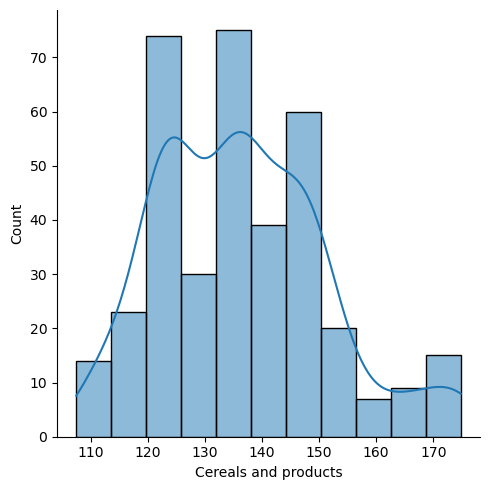

Meat and fish


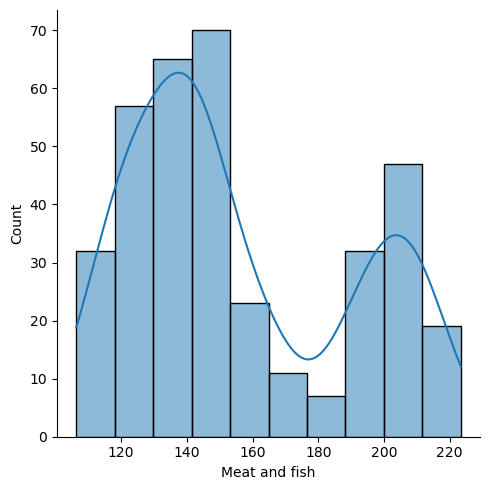

Egg


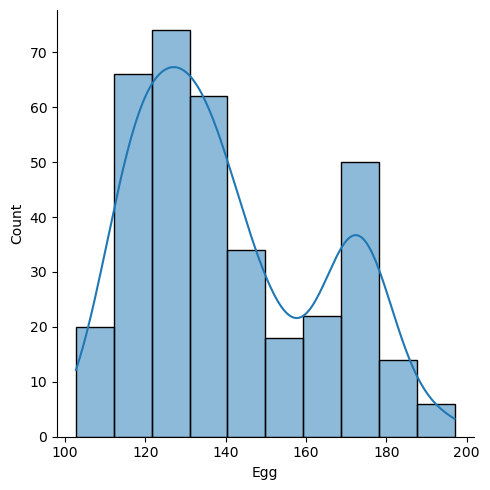

Milk and products


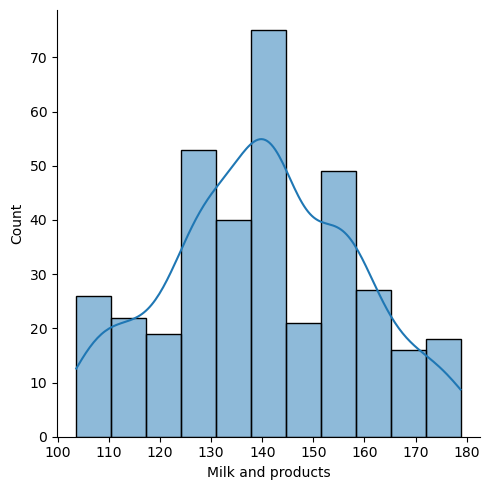

Oils and fats


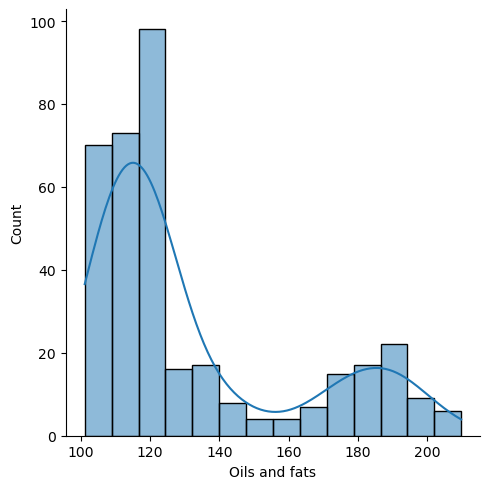

Fruits


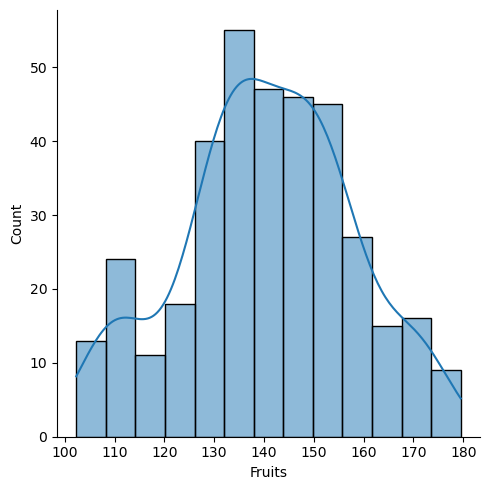

Vegetables


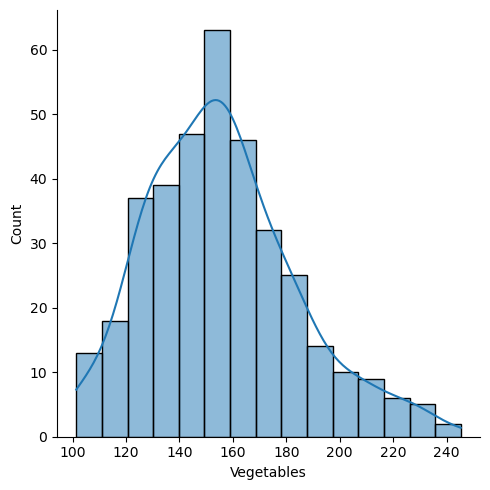

Pulses and products


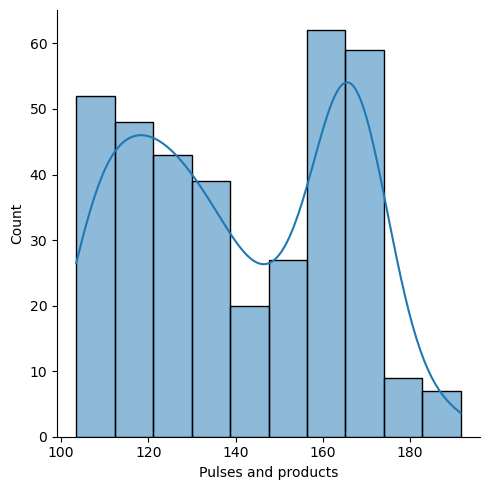

Sugar and Confectionery


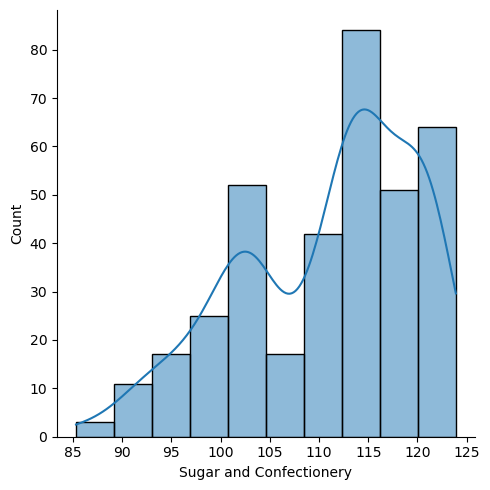

Spices


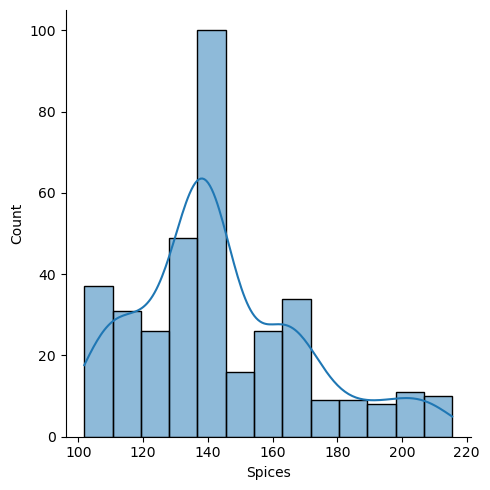

Non-alcoholic beverages


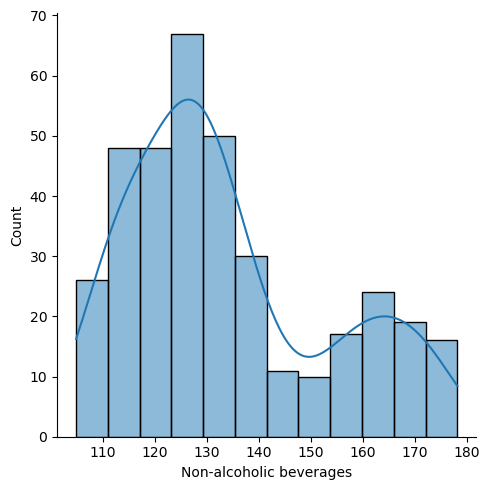

Prepared meals, snacks, sweets etc.


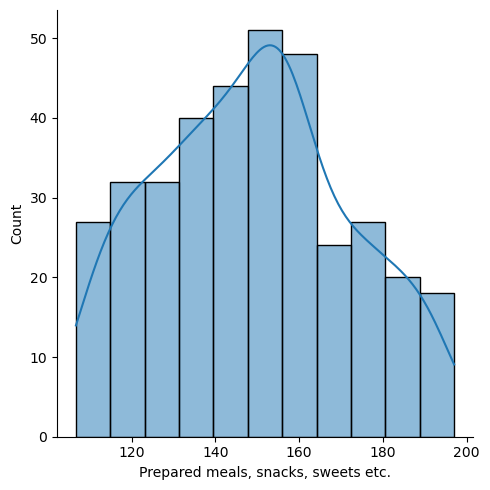

Food and beverages


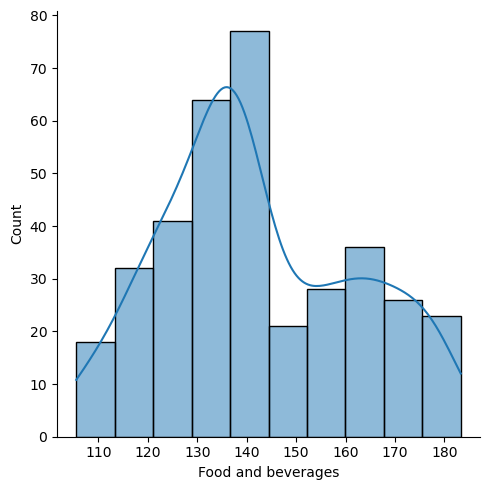

Pan, tobacco and intoxicants


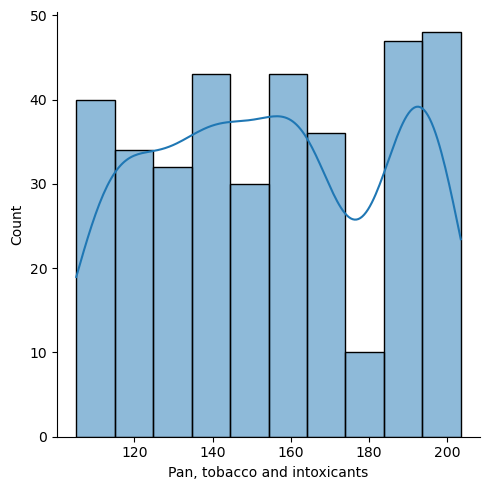

Clothing


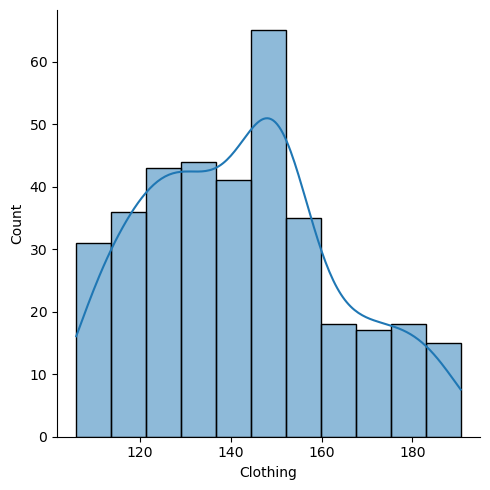

Footwear


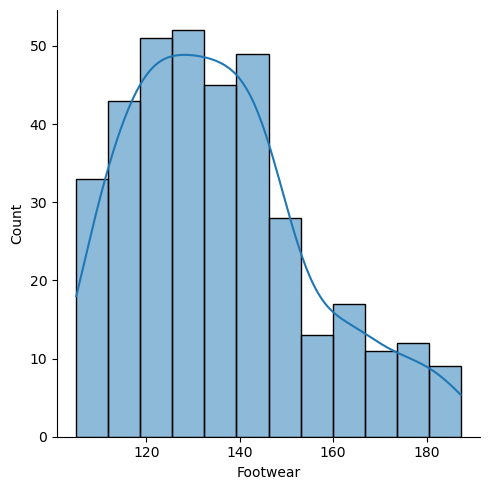

Clothing and footwear


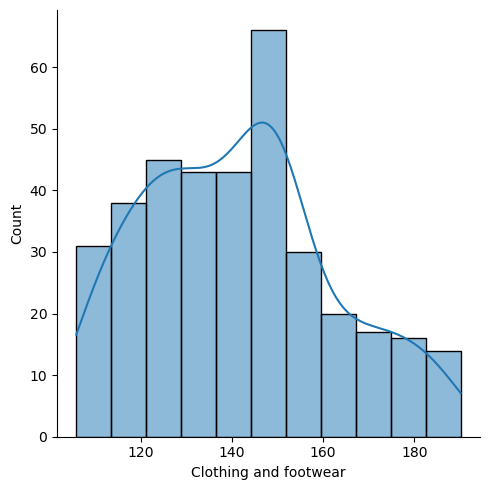

Fuel and light


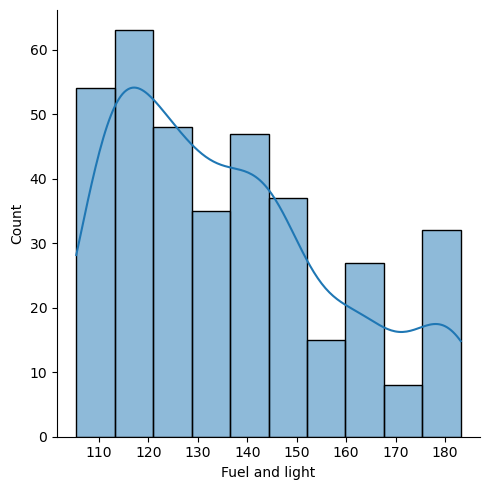

Household goods and services


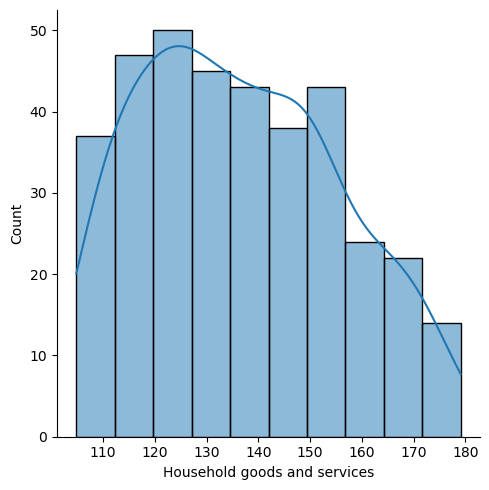

Health


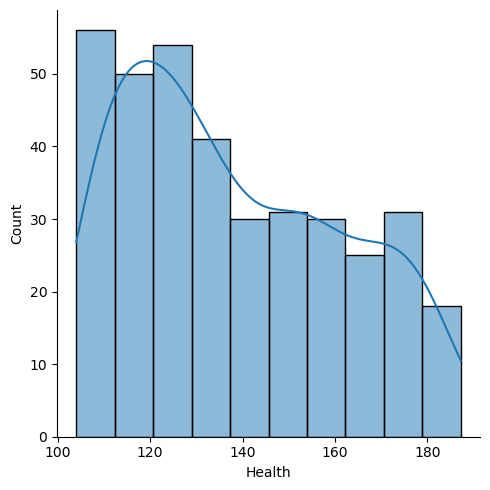

Transport and communication


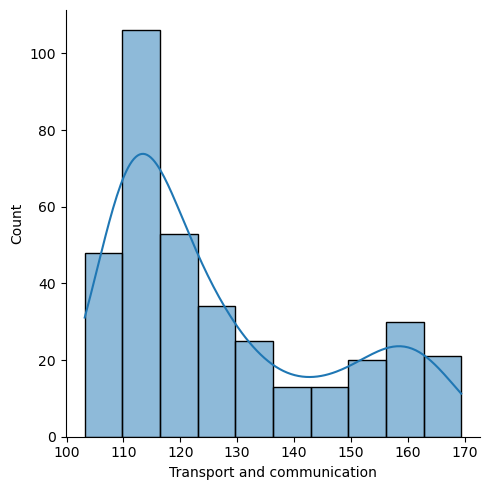

Recreation and amusement


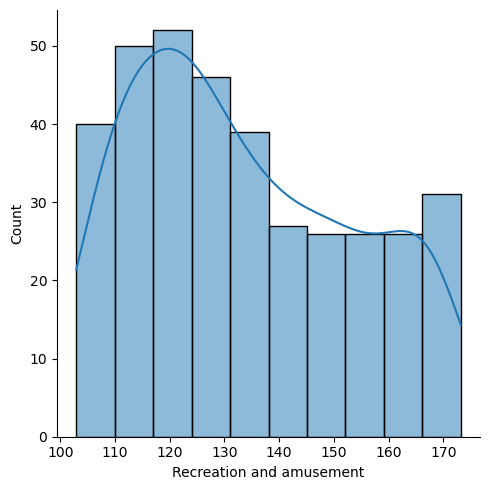

Education


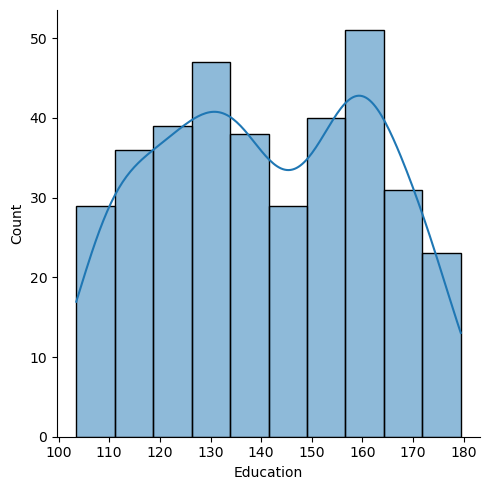

Personal care and effects


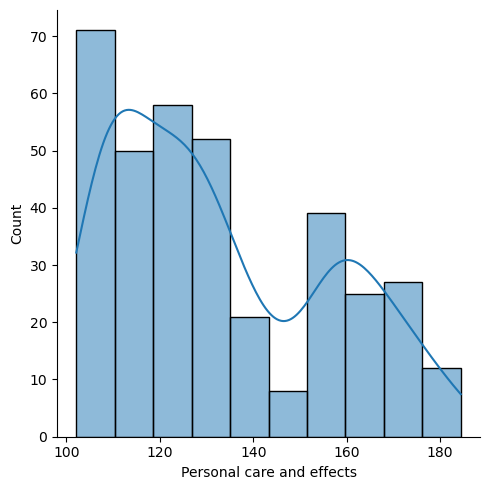

Miscellaneous


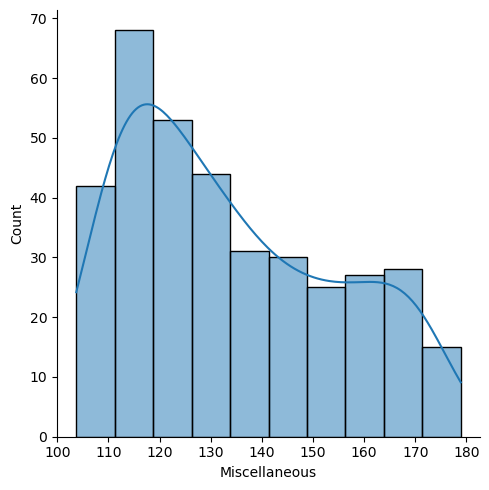

General index


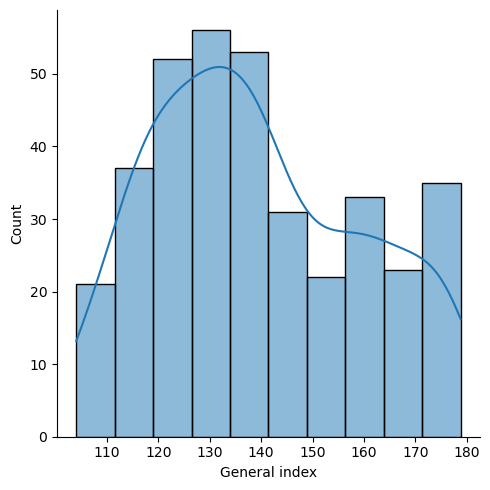

In [17]:
numerical_feature = cpi_data.select_dtypes(include='float')

# Set a smaller figure size
plt.figure(figsize=(10, 6))

for n in numerical_feature.columns:
    print(n)
    
    sns.displot(numerical_feature[n], kde=True)
    plt.tight_layout()  # Adjust layout to fit the screen without scroll bars
    plt.show()

# Bivariate Plot

In [18]:
food_featur=['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products',
       'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products',
       'Sugar and Confectionery', 'Spices', 
       'Prepared meals, snacks, sweets etc.', 'Food and beverages']


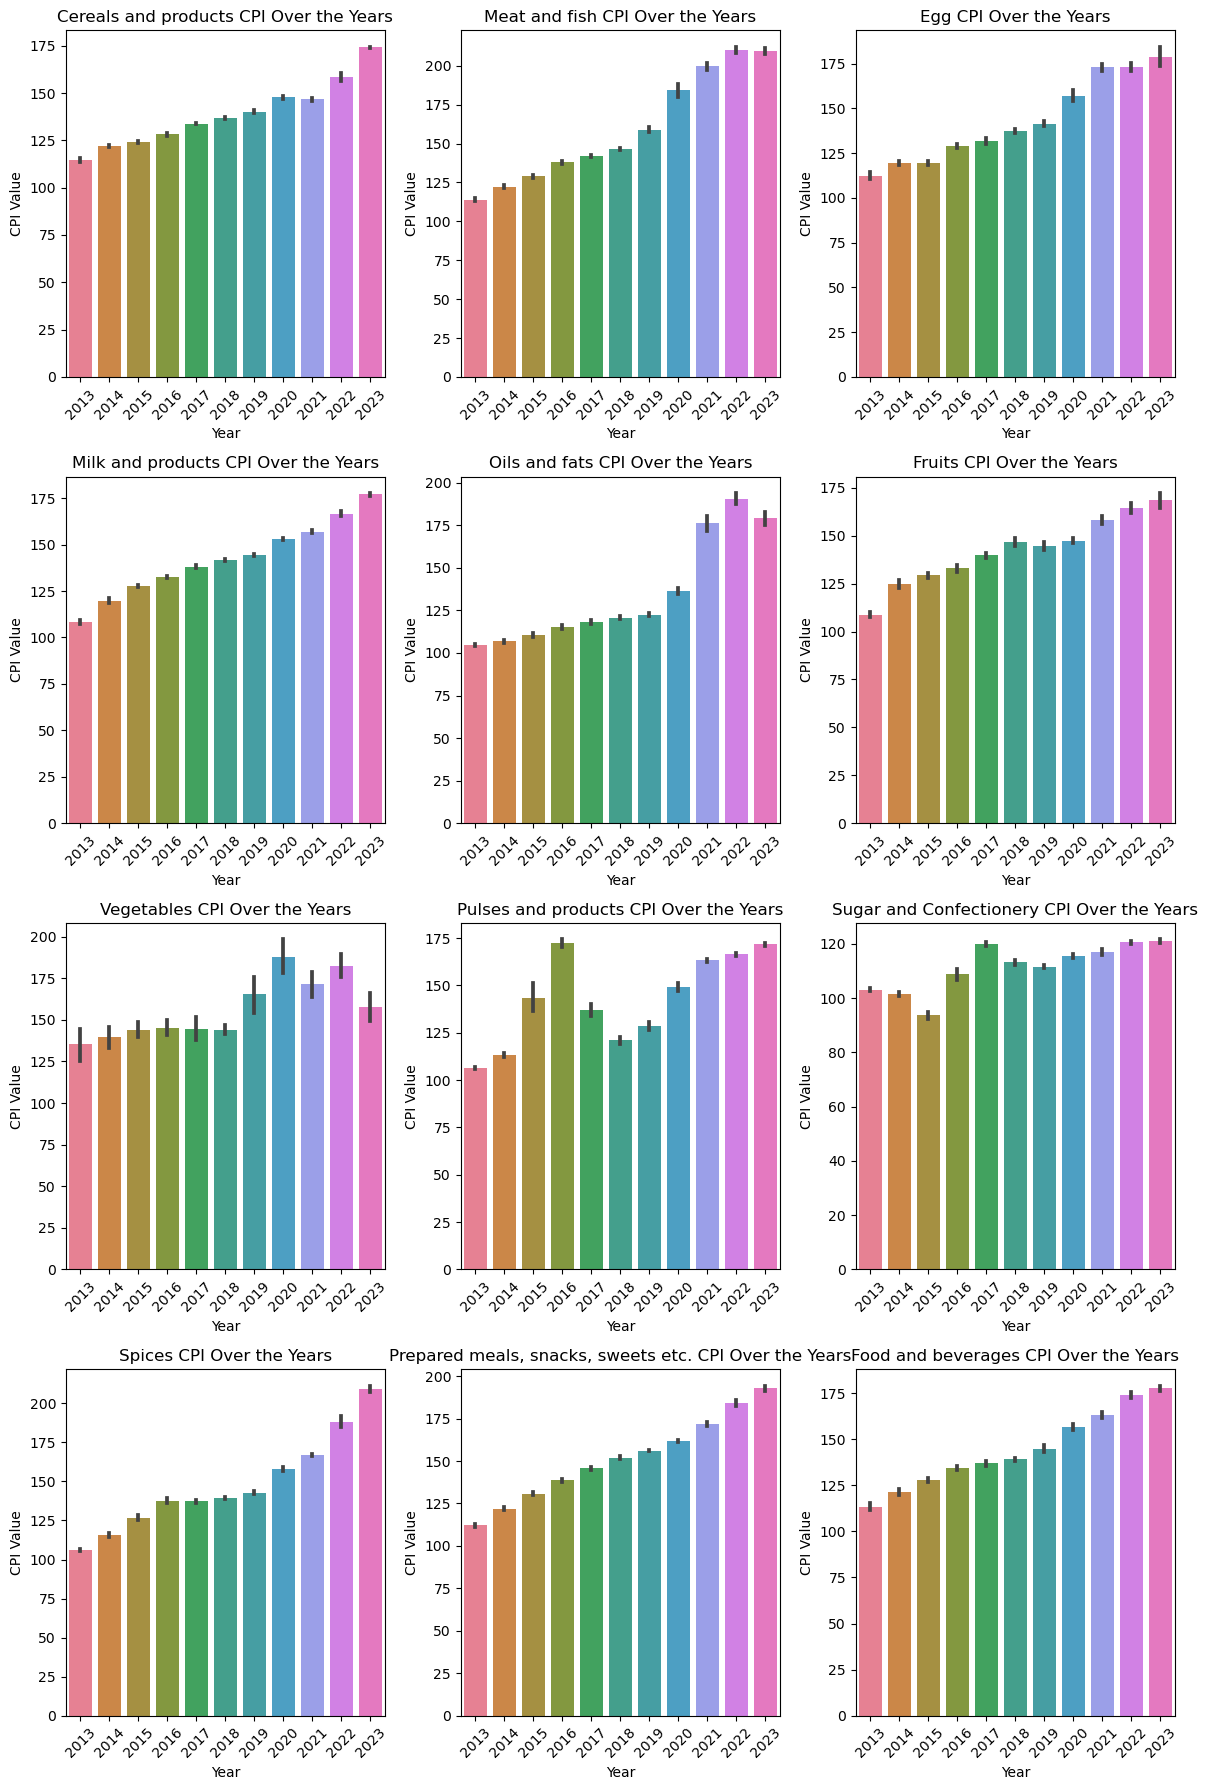

In [19]:
# Create a custom color palette with distinct colors for each year
unique_years = cpi_data['Year'].unique()
n_colors = len(unique_years)
custom_palette = sns.color_palette("husl", n_colors=n_colors)

# Create a bar plot for each of the remaining columns with 'Year' on the x-axis
plt.figure(figsize=(12, 18))  # Adjust the figure size as needed

for i, column in enumerate(food_featur):
    plt.subplot(4, 3, i + 1)  # Create a grid of subplots
    data_subset = cpi_data[['Year', column]]
    sns.barplot(data=data_subset, x='Year', y=column, palette=custom_palette)
    plt.title(f'{column} CPI Over the Years')
    plt.xlabel('Year')
    plt.ylabel('CPI Value')
    plt.xticks(rotation=45)

plt.tight_layout()

# Show the bar plots
plt.show()

In [20]:
other_features=[ 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear',
       'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects']

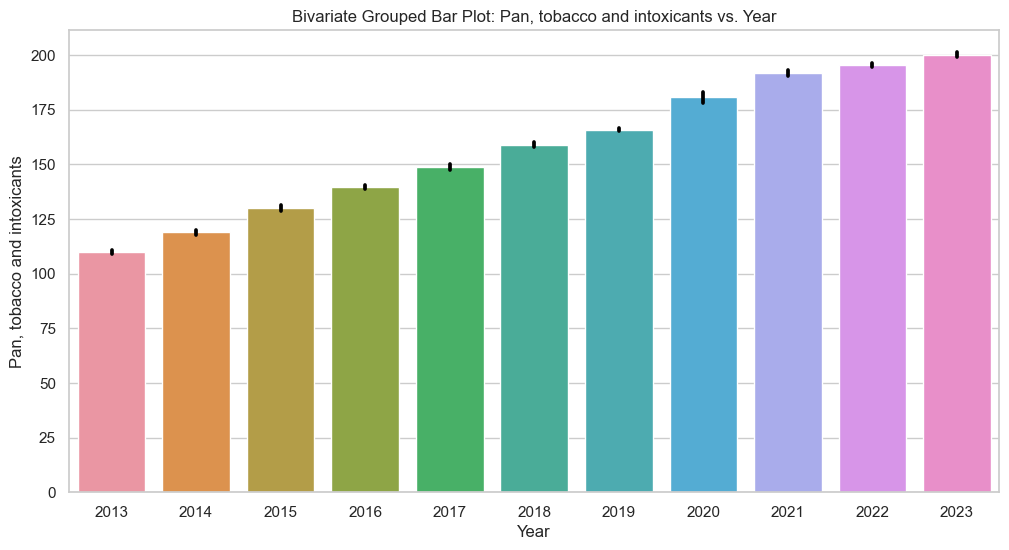

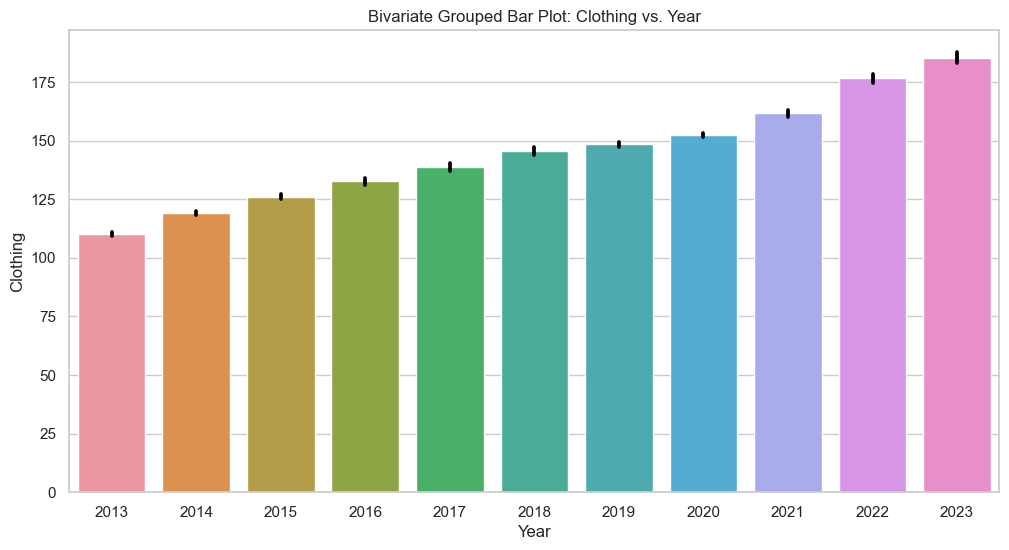

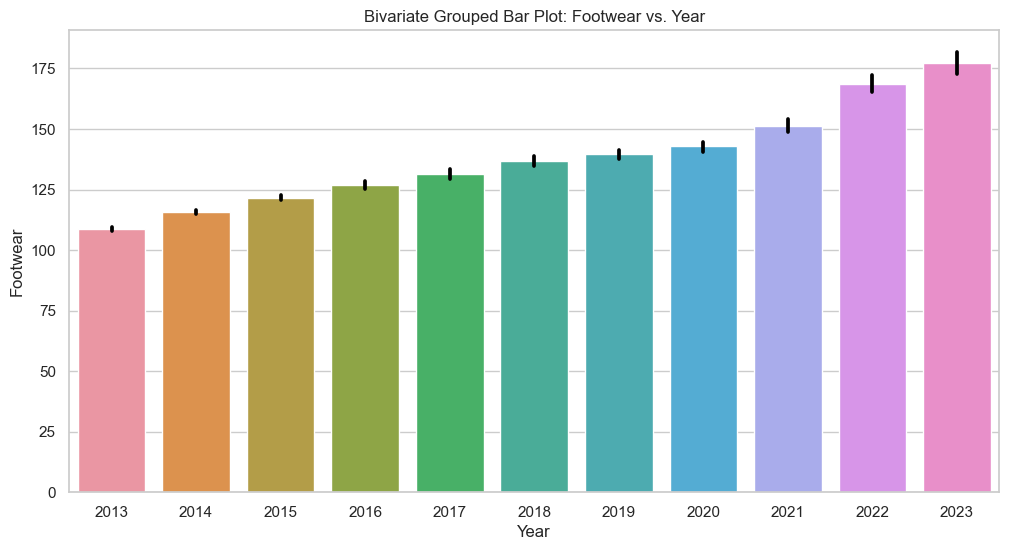

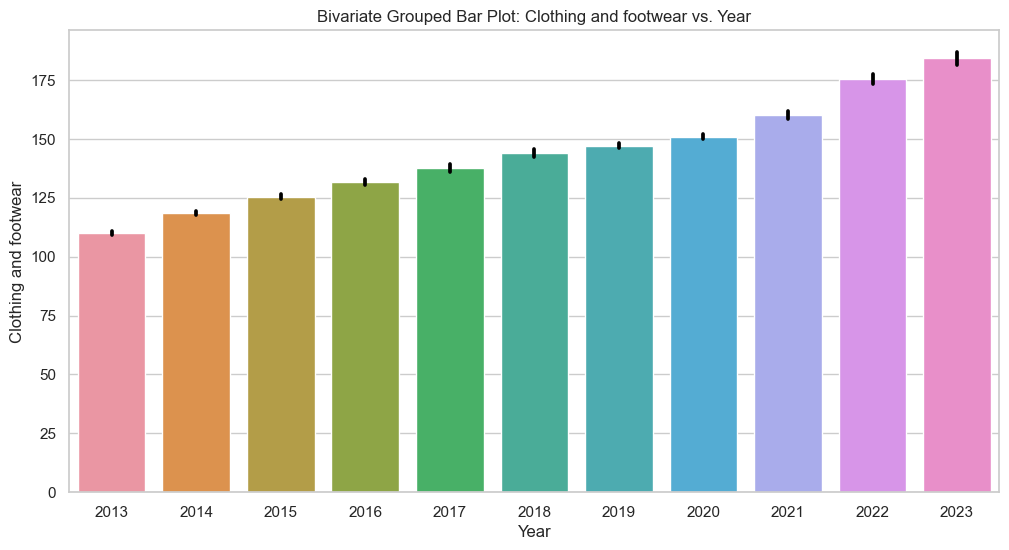

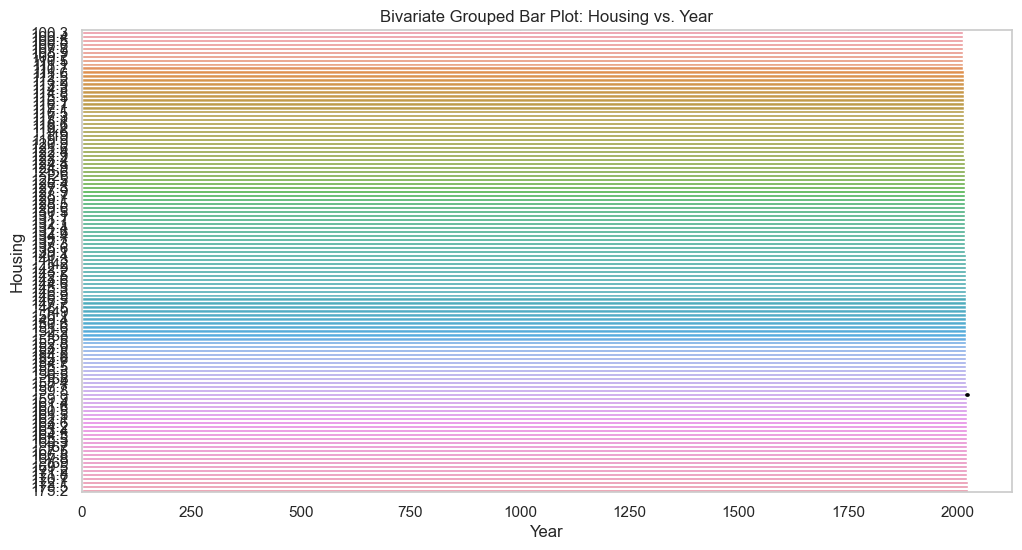

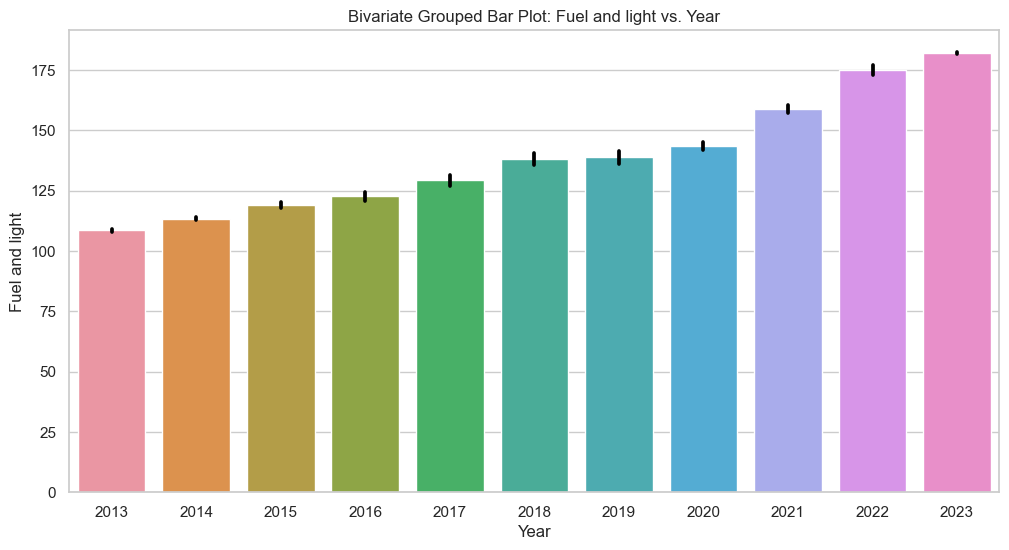

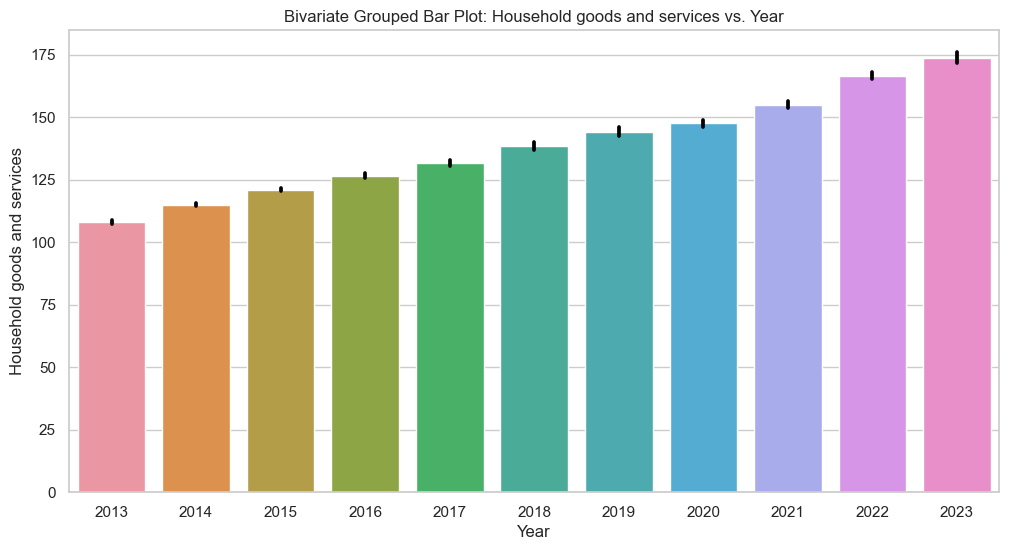

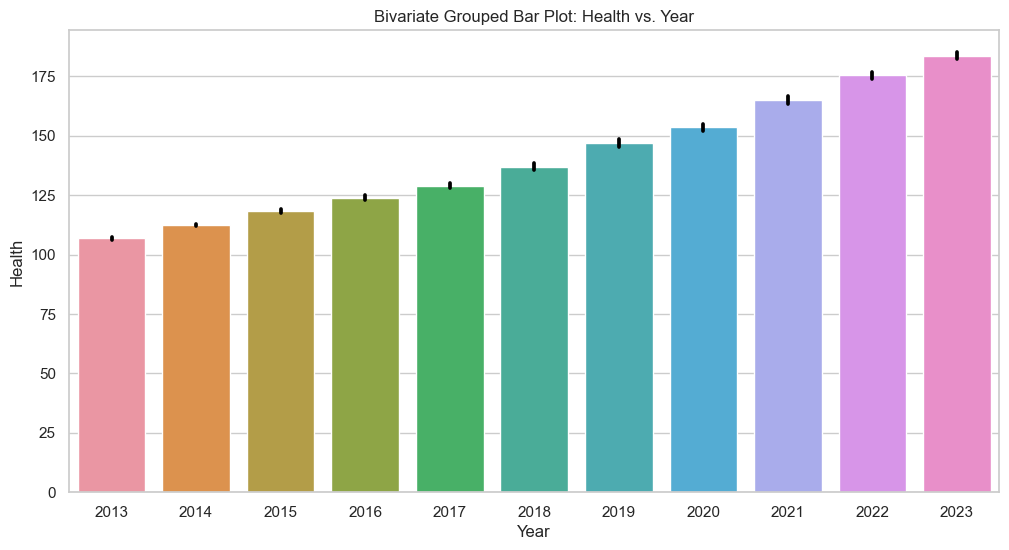

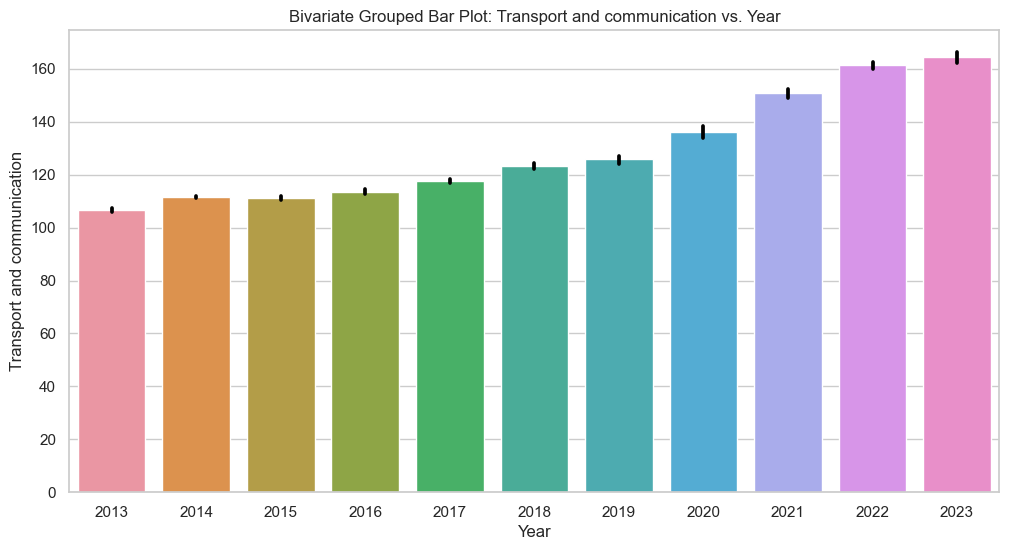

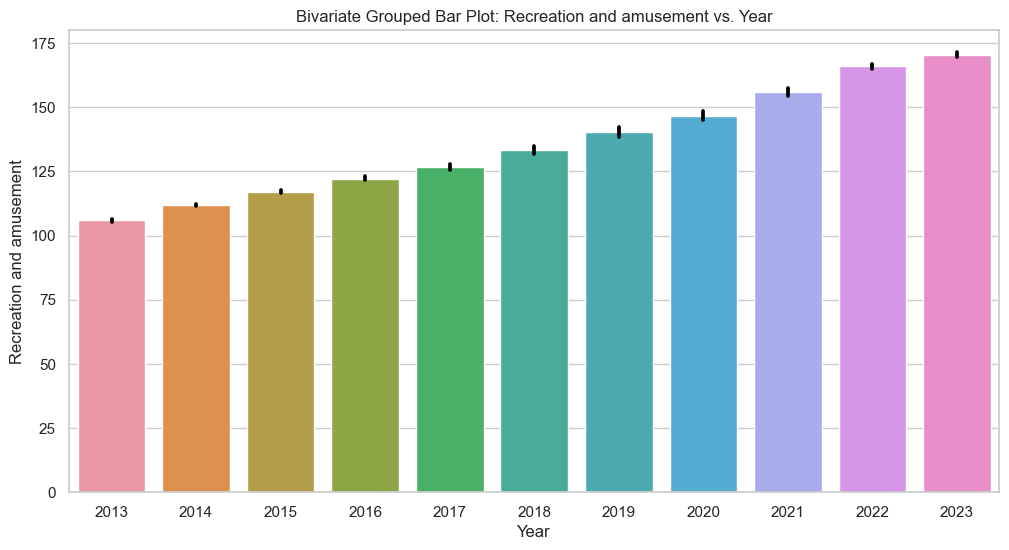

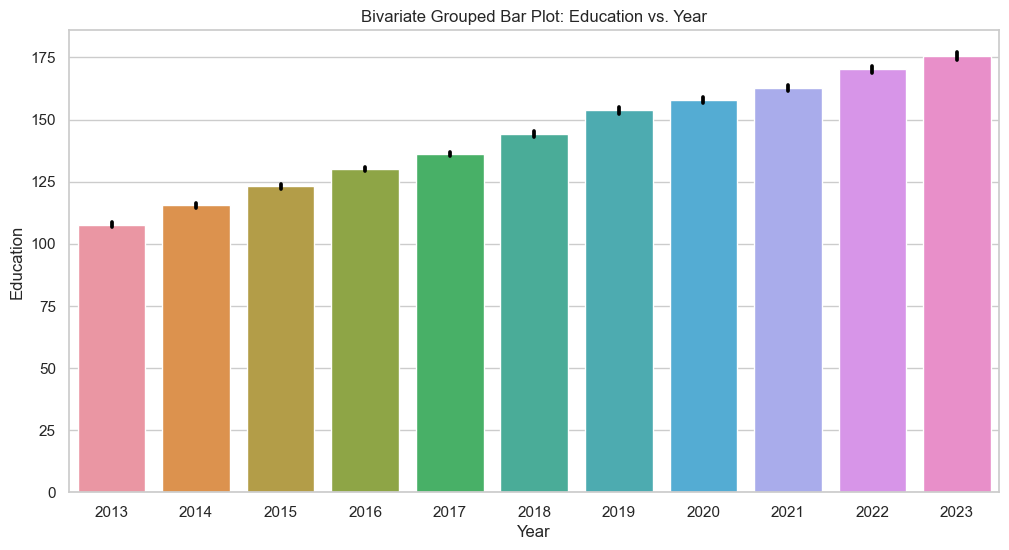

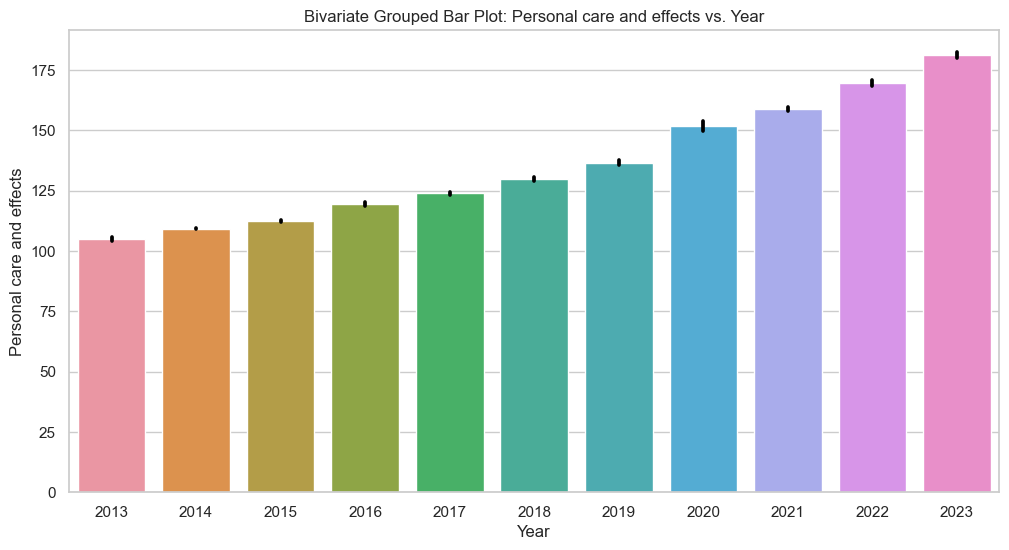

In [21]:
# Set the style if needed
sns.set(style="whitegrid")

# Create a grouped bar plot for each feature
for feature in other_features:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=cpi_data, x='Year', y=feature, errcolor='black')
    plt.title(f'Bivariate Grouped Bar Plot: {feature} vs. Year')
    plt.show()

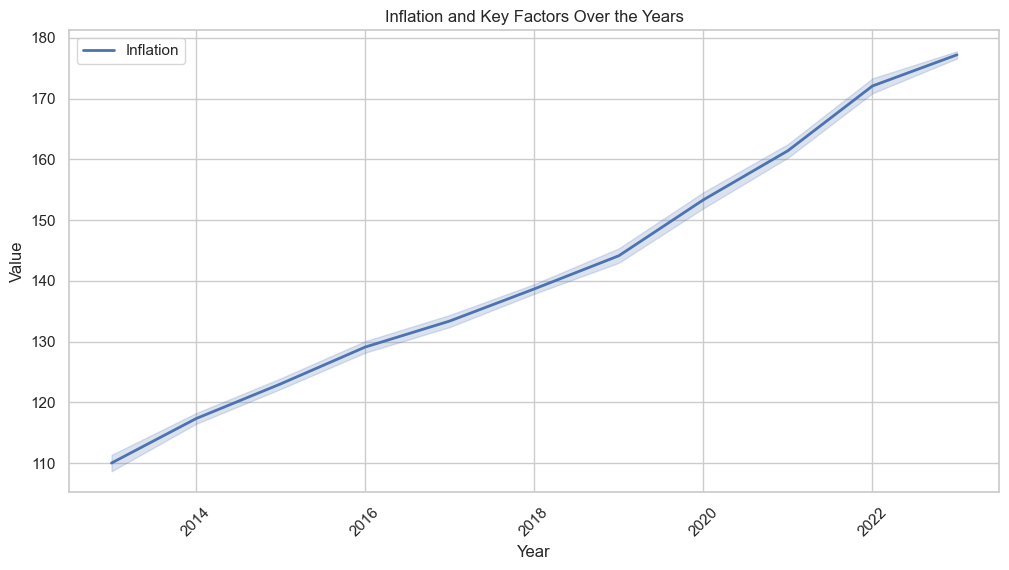

In [22]:
# Plot for Target variable over the years
# Set the style of the plot
sns.set_style("whitegrid")

# Create a line plot for 'General index' column over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=cpi_data, x='Year', y='General index', label='Inflation', linewidth=2)
plt.title('Inflation and Key Factors Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Display a legend
plt.legend(loc='best')

# Show the plot
plt.show()

# Multivariate Plot

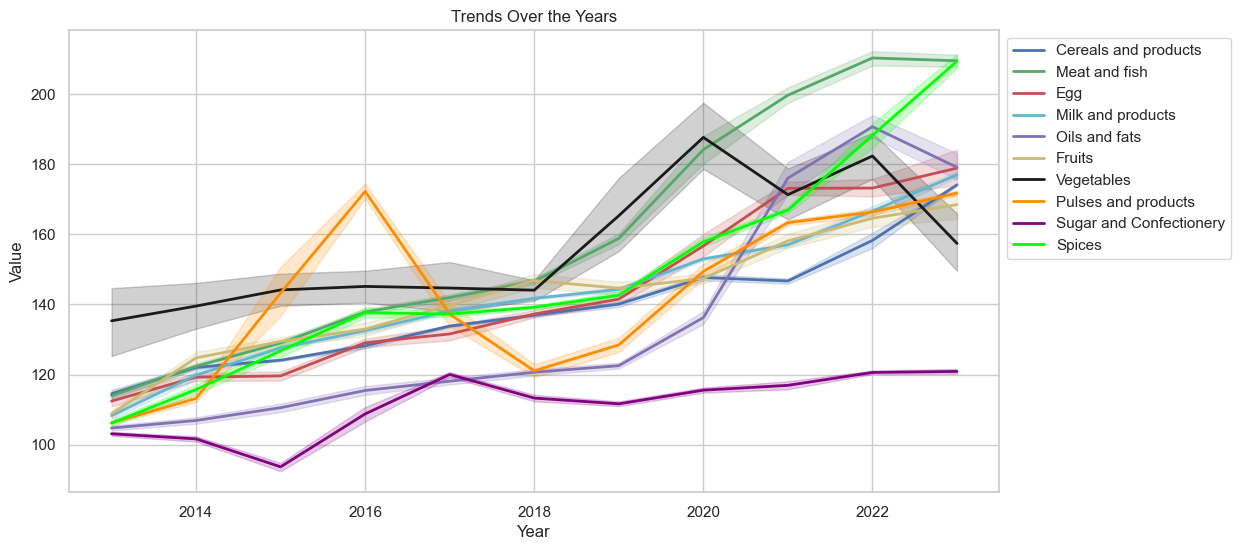

In [23]:
# Select the specific columns to plot
columns_to_plot = ['Year', 'Cereals and products', 'Meat and fish', 'Egg', 'Milk and products',
                   'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products',
                   'Sugar and Confectionery', 'Spices']

# Create a subset of the DataFrame with the selected columns
data_subset = cpi_data[columns_to_plot]

# Define a custom color palette with distinct colors
custom_palette = [
    'b',  # Blue
    'g',  # Green
    'r',  # Red
    'c',  # Cyan
    'm',  # Magenta
    'y',  # Yellow
    'k',  # Black
    'darkorange',
    'purple',
    'lime'
]

# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette(custom_palette)

# Create a line plot for all columns with 'Year' on the x-axis
plt.figure(figsize=(12, 6))
for column in columns_to_plot[1:]:
    sns.lineplot(data=data_subset, x='Year', y=column, label=column, linewidth=2)

plt.title('Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')

# Display a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


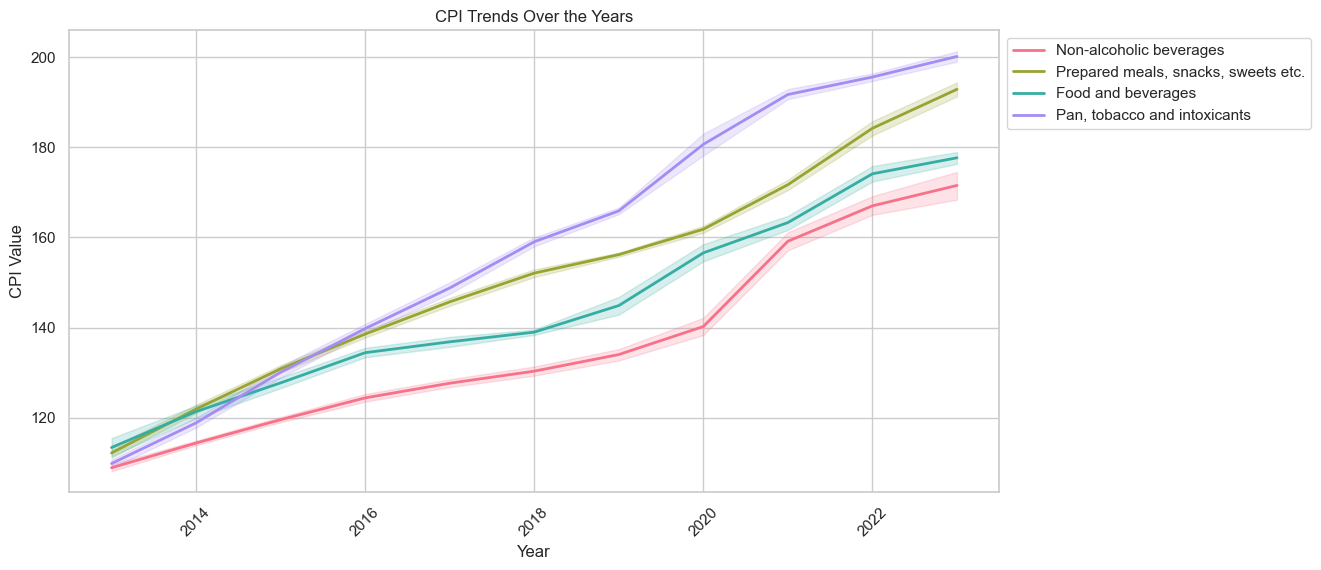

In [24]:
# Select the specific columns of interest
selected_columns = ['Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
                   'Food and beverages', 'Pan, tobacco and intoxicants']

# Create a subset of the DataFrame with the selected columns
data_selectset = cpi_data[selected_columns]

# Set the style and palette
sns.set_style("whitegrid")
custom_palette = sns.color_palette("husl", len(selected_columns))
sns.set_palette(custom_palette)

# Create a line plot for each selected column
plt.figure(figsize=(12, 6))

for column in selected_columns:
    sns.lineplot(data=cpi_data, x='Year', y=column, label=column, linewidth=2)

plt.title('CPI Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.xticks(rotation=45)

# Display a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [25]:
cpi_data.shape

(369, 30)

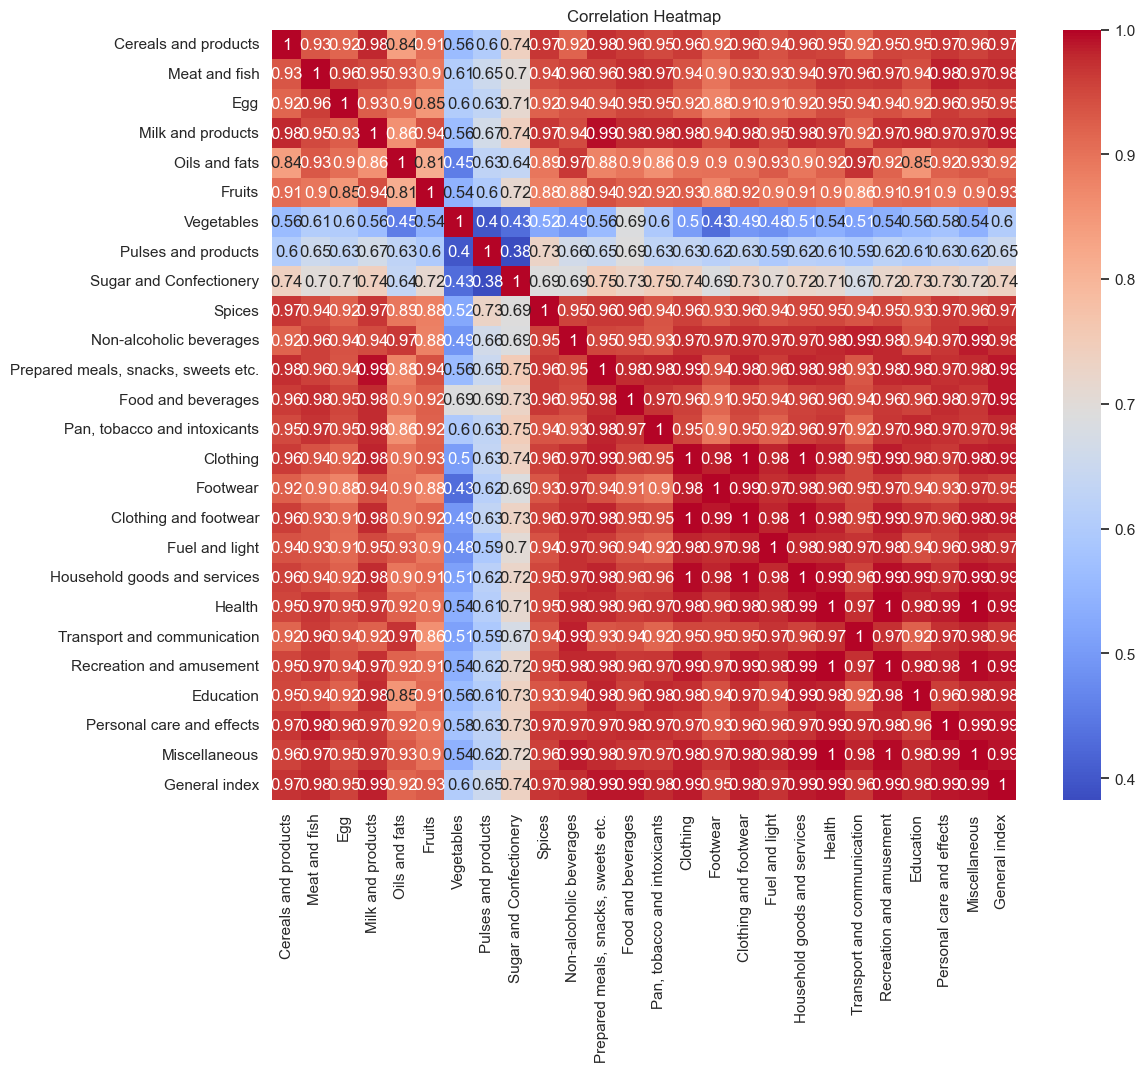

In [26]:
# Select the columns of interest
columns_for_correlation = ['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats',
                    'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices',
                    'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages',
                    'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear',
                    'Housing', 'Fuel and light',  'Household goods and services', 'Health',
                    'Transport and communication', 'Recreation and amusement', 'Education',
                    'Personal care and effects', 'Miscellaneous','General index']

# Create a subset of the DataFrame with the selected columns
data_for_heatmap = cpi_data[columns_for_correlation]

correlation_matrix = data_for_heatmap.corr(numeric_only=True)

# Create a heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data pre-processing

In [27]:
# List of columns with missing values
columns_with_missing = ['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats',
                       'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices',
                       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.', 'Food and beverages',
                       'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear',
                       'Fuel and light', 'Household goods and services', 'Health',
                       'Transport and communication', 'Recreation and amusement', 'Education',
                       'Personal care and effects', 'Miscellaneous','Housing']
# Replace non-numeric values ('-') with NaN
cpi_data['Housing'] = pd.to_numeric(cpi_data['Housing'], errors='coerce')

# Impute missing values with linear interpolation
for column in columns_with_missing:
    cpi_data[column] = cpi_data[column].interpolate(method='linear', limit_direction='both')

# Verify that missing values have been imputed
print(cpi_data[columns_with_missing].isnull().sum())


Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Fuel and light                         0
Household goods and services           0
Health                                 0
Transport and communication            0
Recreation and amusement               0
Education                              0
Personal care and effects              0
Miscellaneous   

# Feature Analysis

In [28]:
cpi_data['Cereals'] = cpi_data['Cereals and products'] + cpi_data['Pulses and products']

In [29]:
cpi_data1=cpi_data.drop(['Cereals and products','Pulses and products'],axis=1)

In [30]:
cpi_data1['Meat_Egg'] = cpi_data1['Meat and fish'] + cpi_data['Egg']

In [31]:
cpi_data2=cpi_data1.drop(['Meat and fish','Egg'],axis=1)

In [32]:
cpi_data2['Fruits_Vegetables'] = cpi_data['Fruits'] + cpi_data['Vegetables']

In [33]:
cpi_data3=cpi_data2.drop(['Fruits','Vegetables'],axis=1)

In [34]:
cpi_data3['Food_Beverages'] = cpi_data3['Food and beverages'] + cpi_data3['Non-alcoholic beverages']

In [35]:
cpi_data4=cpi_data3.drop(['Food and beverages','Non-alcoholic beverages'],axis=1)

In [36]:
cpi_data4 = cpi_data4.drop(['Clothing', 'Footwear'], axis=1)

In [37]:
cpi_data4['Household_and_Housing'] = cpi_data4['Household goods and services'] + cpi_data4['Housing']

In [38]:
cpi_data5=cpi_data4.drop(['Household goods and services','Housing'], axis=1)

In [39]:
cpi_data5

,Sector,Year,Month,Milk and products,Oils and fats,Sugar and Confectionery,Spices,"Prepared meals, snacks, sweets etc.","Pan, tobacco and intoxicants",Clothing and footwear,...,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Cereals,Meat_Egg,Fruits_Vegetables,Food_Beverages,Household_and_Housing
0,Rural,2013,January,104.9,106.1,106.8,103.1,106.7,105.1,106.4,...,103.4,103.8,104.7,104.0,105.1,213.6,214.4,205.8,210.3,205.10
1,Urban,2013,January,103.6,103.4,105.1,101.8,107.9,105.2,105.8,...,102.9,103.5,104.3,103.7,104.0,216.3,222.1,205.2,211.0,205.10
2,Rural+Urban,2013,January,104.4,105.1,106.2,102.7,107.3,105.1,106.2,...,103.1,103.6,104.5,103.9,104.6,214.4,217.3,205.4,210.5,205.10
3,Rural,2013,February,105.4,106.7,105.7,103.1,107.7,105.6,107.0,...,104.0,104.1,104.6,104.4,105.8,215.1,218.9,206.4,211.4,205.55
4,Urban,2013,February,104.0,103.5,103.8,102.3,109.0,106.0,106.4,...,103.3,103.7,104.3,104.3,104.7,217.0,229.8,208.0,213.2,205.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,Urban,2023,March,177.9,172.2,121.9,204.8,196.6,202.7,178.2,...,168.4,172.5,181.5,170.0,176.3,346.9,389.4,348.0,345.7,342.70
365,Rural+Urban,2023,March,177.3,179.2,120.0,209.7,193.0,199.5,185.1,...,170.3,175.0,181.0,174.1,177.2,345.5,382.9,322.3,349.3,347.70
366,Rural,2023,April,178.2,178.5,120.4,215.5,190.5,199.5,190.2,...,173.2,179.4,183.8,178.9,178.8,346.1,374.8,316.5,353.7,353.45
367,Urban,2023,April,178.8,168.7,123.1,207.8,197.0,203.5,178.9,...,168.8,174.2,184.4,170.9,177.4,349.5,386.1,359.1,347.6,344.80


In [40]:
# Label Encoding
label_encoder = LabelEncoder()
cpi_data5['Sector'] = label_encoder.fit_transform(cpi_data5['Sector'])


In [41]:
cpi_data5['Month'] = label_encoder.fit_transform(cpi_data5['Month'])

In [42]:
cpi_data5

,Sector,Year,Month,Milk and products,Oils and fats,Sugar and Confectionery,Spices,"Prepared meals, snacks, sweets etc.","Pan, tobacco and intoxicants",Clothing and footwear,...,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Cereals,Meat_Egg,Fruits_Vegetables,Food_Beverages,Household_and_Housing
0,0,2013,4,104.9,106.1,106.8,103.1,106.7,105.1,106.4,...,103.4,103.8,104.7,104.0,105.1,213.6,214.4,205.8,210.3,205.10
1,2,2013,4,103.6,103.4,105.1,101.8,107.9,105.2,105.8,...,102.9,103.5,104.3,103.7,104.0,216.3,222.1,205.2,211.0,205.10
2,1,2013,4,104.4,105.1,106.2,102.7,107.3,105.1,106.2,...,103.1,103.6,104.5,103.9,104.6,214.4,217.3,205.4,210.5,205.10
3,0,2013,3,105.4,106.7,105.7,103.1,107.7,105.6,107.0,...,104.0,104.1,104.6,104.4,105.8,215.1,218.9,206.4,211.4,205.55
4,2,2013,3,104.0,103.5,103.8,102.3,109.0,106.0,106.4,...,103.3,103.7,104.3,104.3,104.7,217.0,229.8,208.0,213.2,205.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2,2023,7,177.9,172.2,121.9,204.8,196.6,202.7,178.2,...,168.4,172.5,181.5,170.0,176.3,346.9,389.4,348.0,345.7,342.70
365,1,2023,7,177.3,179.2,120.0,209.7,193.0,199.5,185.1,...,170.3,175.0,181.0,174.1,177.2,345.5,382.9,322.3,349.3,347.70
366,0,2023,0,178.2,178.5,120.4,215.5,190.5,199.5,190.2,...,173.2,179.4,183.8,178.9,178.8,346.1,374.8,316.5,353.7,353.45
367,2,2023,0,178.8,168.7,123.1,207.8,197.0,203.5,178.9,...,168.8,174.2,184.4,170.9,177.4,349.5,386.1,359.1,347.6,344.80


In [43]:
# After applying random forest regressor .it provided feature ranking so we will buid model on selected features
# Get feature importances
# Create a Random Forest model
#  model = RandomForestClassifier()  # Use RandomForestRegressor for regression tasks

# # Fit the model to your data
# model.fit(X, y)
# feature_importances = model.feature_importances_

# # Create a DataFrame to display feature names and their importances
# feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# # Sort the DataFrame by feature importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance rankings
#print(feature_importance_df)
#  Feature  Importance
# 20                       Food_Beverages    0.389203
# 15            Personal care and effects    0.232098
# 7   Prepared meals, snacks, sweets etc.    0.094909
# 3                     Milk and products    0.078905
# 18                             Meat_Egg    0.065346
# 16                        Miscellaneous    0.036911
# 11                               Health    0.031723
# 13             Recreation and amusement    0.022763
# 10                       Fuel and light    0.015542
# 21                Household_and_Housing    0.010501
# 14                            Education    0.009299
# 6                                Spices    0.005614
# 9                 Clothing and footwear    0.004979
# 17                              Cereals    0.000955
# 4                         Oils and fats    0.000475
# 12          Transport and communication    0.000277
# 8          Pan, tobacco and intoxicants    0.000268
# 19                    Fruits_Vegetables    0.000104
# 5               Sugar and Confectionery    0.000054
# 2                                 Month    0.000053
# 0                                Sector    0.000019
# 1                                  Year    0.000001
# #

In [44]:
cpi_data6=cpi_data5.copy()

In [45]:
cpi_data6=cpi_data6.drop(['Spices','Clothing and footwear','Cereals','Oils and fats','Transport and communication','Pan, tobacco and intoxicants','Fruits_Vegetables','Sugar and Confectionery','Month','Sector','Year','Recreation and amusement','Fuel and light','Household_and_Housing','Education'], axis=1)

In [46]:
cpi_data6

,Milk and products,"Prepared meals, snacks, sweets etc.",Health,Personal care and effects,Miscellaneous,General index,Meat_Egg,Food_Beverages
0,104.9,106.7,104.0,104.7,104.0,105.1,214.4,210.3
1,103.6,107.9,104.1,104.3,103.7,104.0,222.1,211.0
2,104.4,107.3,104.0,104.5,103.9,104.6,217.3,210.5
3,105.4,107.7,104.4,104.6,104.4,105.8,218.9,211.4
4,104.0,109.0,104.7,104.3,104.3,104.7,229.8,213.2
...,...,...,...,...,...,...,...,...
364,177.9,196.6,180.8,181.5,170.0,176.3,389.4,345.7
365,177.3,193.0,184.4,181.0,174.1,177.2,382.9,349.3
366,178.2,190.5,187.2,183.8,178.9,178.8,374.8,353.7
367,178.8,197.0,181.5,184.4,170.9,177.4,386.1,347.6


In [47]:
cpi_data6['General index'] = cpi_data6['General index'].interpolate(method='linear') # impute Nan values in target variable

# Model building

In [48]:
# X should contain your feature columns, and y should be your target variable
X= cpi_data6.drop('General index',axis=1)
y=cpi_data6['General index']

In [49]:
# Split the data into a training set and a test set
X_train ,X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(295, 7) (74, 7) (295,) (74,)


In [51]:
# Define a MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = min_max_scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = min_max_scaler.transform(X_test)

In [52]:
# # After applying random forest regressor .it provided feature ranking so we will buid model on selected features
# # Get feature importances
# # Create a Random Forest model
# model = RandomForestRegressor()  # Use RandomForestRegressor for regression tasks

# # Fit the model to your data
# model.fit(X, y)
# feature_importances = model.feature_importances_

# # Create a DataFrame to display feature names and their importances
# feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# # Sort the DataFrame by feature importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Print or visualize the feature importance rankings
# print(feature_importance_df)
#  Feature  Importance
# 20                       Food_Beverages    0.389203
# 15            Personal care and effects    0.232098
# 7   Prepared meals, snacks, sweets etc.    0.094909
# 3                     Milk and products    0.078905
# 18                             Meat_Egg    0.065346
# 16                        Miscellaneous    0.036911
# 11                               Health    0.031723
# 13             Recreation and amusement    0.022763
# 10                       Fuel and light    0.015542
# 21                Household_and_Housing    0.010501
# 14                            Education    0.009299
# 6                                Spices    0.005614
# 9                 Clothing and footwear    0.004979
# 17                              Cereals    0.000955
# 4                         Oils and fats    0.000475
# 12          Transport and communication    0.000277
# 8          Pan, tobacco and intoxicants    0.000268
# 19                    Fruits_Vegetables    0.000104
# 5               Sugar and Confectionery    0.000054
# 2                                 Month    0.000053
# 0                                Sector    0.000019
# 1                                  Year    0.000001
# #

In [53]:
#cpi_data6=cpi_data6.drop(['Spices','Clothing and footwear','Non-alcoholic beverages','Oils and fats','Transport and communication','Pan, tobacco and intoxicants','Meat and fish', 'Clothing','Cereals','Pulses and products','Egg','Footwear','Fruits','Vegetables','Sugar and Confectionery','Month','Sector','Year','Recreation and amusement','Fuel and light','Education'], axis=1)

# Linear regression

In [90]:
# Fit each model to the training data
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
train_pred_lr = linear_regression.predict(X_train)
test_pred_lr = linear_regression.predict(X_test)
# Evaluate the model on the training set
train_rmse_knn = np.sqrt(mean_squared_error(y_train, train_pred_lr))
train_r2 = r2_score(y_train, train_pred_lr)
# Evaluate the model on the testing set
test_rmse_knn = np.sqrt(mean_squared_error(y_test, test_pred_lr))
test_r2 = r2_score(y_test, test_pred_lr)
print("Linear Regression Training RMSE:", train_rmse_lr)
print("Linear Regression Test RMSE:", test_rmse_lr)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Linear Regression Training RMSE: 1.0310169362844162
Linear Regression Test RMSE: 1.0675346076935475
Training R-squared: 0.9973157097397496
Testing R-squared: 0.9971908632322528


# Random Forest

In [89]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
train_pred_rf = random_forest_regressor.predict(X_train)
test_pred_rf = random_forest_regressor.predict(X_test)
# Evaluate the model on the training set
train_rmse_knn = np.sqrt(mean_squared_error(y_train, train_pred_rf))
train_r2 = r2_score(y_train, train_pred_rf)
# Evaluate the model on the testing set
test_rmse_knn = np.sqrt(mean_squared_error(y_test, test_pred_rf))
test_r2 = r2_score(y_test, test_pred_rf)
print("RandomForest Regressor Training RMSE:", train_rmse_rf)
print("RandomForest Regressor Test RMSE:", test_rmse_rf)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

RandomForest Regressor Training RMSE: 0.24018363060281397
RandomForest Regressor Test RMSE: 0.5611126521822998
Training R-squared: 0.9998484029238415
Testing R-squared: 0.9992387557561532


# Adaboost

In [88]:
adaboost_regressor = AdaBoostRegressor()
adaboost_regressor.fit(X_train, y_train)
train_pred_ab = adaboost_regressor.predict(X_train)
test_pred_ab = adaboost_regressor.predict(X_test)
# Evaluate the model on the training set
train_rmse_knn = np.sqrt(mean_squared_error(y_train, train_pred_ab))
train_r2 = r2_score(y_train, train_pred_ab)
# Evaluate the model on the testing set
test_rmse_knn = np.sqrt(mean_squared_error(y_test, test_pred_ab))
test_r2 = r2_score(y_test, test_pred_ab)
print("AdaBoost Regressor Training RMSE:", train_rmse_ab)
print("AdaBoost Regressor Test RMSE:", test_rmse_ab)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

AdaBoost Regressor Training RMSE: 0.8823356130526343
AdaBoost Regressor Test RMSE: 0.9558536071568956
Training R-squared: 0.9984377727520609
Testing R-squared: 0.9981623318186886


# Gradiant_boosting

In [87]:
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
train_pred_gb = gradient_boosting.predict(X_train)
test_pred_gb = gradient_boosting.predict(X_test)
# Evaluate the model on the training set
train_rmse_knn = np.sqrt(mean_squared_error(y_train, train_pred_gb))
train_r2 = r2_score(y_train, train_pred_gb)
# Evaluate the model on the testing set
test_rmse_knn = np.sqrt(mean_squared_error(y_test, test_pred_gb))
test_r2 = r2_score(y_test, test_pred_gb)
print("Gradient Boosting Training RMSE:", train_rmse_gb)
print("Gradient Boosting Test RMSE:", test_rmse_gb)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Gradient Boosting Training RMSE: 0.2019582043437243
Gradient Boosting Test RMSE: 0.5623554996188332
Training R-squared: 0.9998959284268294
Testing R-squared: 0.9993541709053352


# KNN Regression

In [86]:
knn_regressor= KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
train_pred_knn = knn_regressor.predict(X_train)
train_pred_knn = knn_regressor.predict(X_train)
test_pred_knn = knn_regressor.predict(X_test)
# Evaluate the model on the training set
train_rmse_knn = np.sqrt(mean_squared_error(y_train, train_pred_knn))
train_r2 = r2_score(y_train, train_pred_knn)
# Evaluate the model on the testing set
test_rmse_knn = np.sqrt(mean_squared_error(y_test, test_pred_knn))
test_r2 = r2_score(y_test, test_pred_knn)
print("KNN Training RMSE:", train_rmse_knn)
print("KNN Test RMSE:", test_rmse_knn)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

KNN Training RMSE: 0.6267545831552035
KNN Test RMSE: 0.8179838127530954
Training R-squared: 0.9990080428466034
Testing R-squared: 0.998350704868963


In [85]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
train_pred_lasso =lasso_model.predict(X_train)
test_pred_lasso =lasso_model.predict(X_test)
# Evaluate the model on the training set
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, train_pred_lasso))
train_r2 = r2_score(y_train, train_pred_lasso)
# Evaluate the model on the testing set
test_r2 = r2_score(y_test, test_pred_lasso)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, test_pred_lasso))
print("Lasso Training RMSE:", train_rmse_lasso)
print("Lasso Test RMSE:", test_rmse_lasso)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Lasso Training RMSE: 1.0475439123135624
Lasso Test RMSE: 1.0606582679829442
Training R-squared: 0.9972289628291677
Testing R-squared: 0.9972269358173809


In [91]:
test_pred_lasso

array([167.10243362, 114.06533866, 108.62061139, 175.46549472,
       119.0954341 , 144.83502545, 120.68085938, 127.91944119,
       163.61857935, 131.8958113 , 143.61964276, 114.0387307 ,
       133.67033558, 118.8599836 , 132.3202243 , 154.96652853,
       105.263852  , 144.88178405, 172.04676153, 125.82595488,
       106.61476649, 138.40647556, 120.57366194, 146.15348934,
       149.47796041, 131.64491908, 143.23584505, 137.56250065,
       135.05726608, 178.79399917, 112.57064211, 127.7344555 ,
       114.59920979, 176.7509568 , 158.7833095 , 128.1250822 ,
       119.90391473, 112.27447157, 131.97116029, 137.04946318,
       149.87239745, 162.65808598, 114.40696995, 142.46758226,
       125.81848014, 128.75167199, 124.66221394, 118.43086935,
       106.07316711, 115.16823502, 174.43922938, 129.10034647,
       156.47360181, 140.41200572, 146.06106128, 172.83774028,
       125.41768577, 105.85084029, 178.89472163, 121.06128249,
       132.77977864, 165.59120774, 121.58965083, 115.34

In [92]:
# Specify the file path where to save the model
model_file_path = 'lasso_regression_model.pkl'

# Save the model to the specified file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lasso_model, model_file)

print(f"Lasso Regression model saved to {model_file_path}")

Lasso Regression model saved to lasso_regression_model.pkl


In [93]:
# Define your single row of input data
input_feature = pd.DataFrame({
    "Milk and products": [178.4],
    "Prepared meals, snacks, sweets etc.": [193.5],
    "Health": [185.0],
    "Personal care and effects": [184.0],
    "Miscellaneous": [175.0],
    "Meat_Egg": [378.9],
    "Food_Beverages": [350.8]
})

In [94]:
predictions = lasso_model.predict(input_feature)

In [95]:
print("Predicted Output:", predictions[0])

Predicted Output: 179.54765773107866
